# Melakukan Impor Beberapa Pustaka Yang Relevan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, recall_score

# Mendefinisikan Beberapa Fungsi Untuk Penunjang Proses Analisis Data dan Performa Model Machine Learning

In [2]:
def vis_kol(dataframe, nama_kol, nama_lengkap, kontinyu):
    """
    Visualisasi fitur dengan dan tanpa loan status.
    - dataframe ialah nama dataframe (pd.Dataframe)
    - nama_kol ialah nama kolom pada dataframe (str)
    - nama_lengkap ialah nama lengkap dari sebuah kolom (str)
    - kontinyu ialah bernilai True jika data numerik, dan False jika data kategorik (bool)
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Visualisasi tanpa loan status
    if kontinyu:
        sns.distplot(dataframe.loc[dataframe[nama_kol].notnull(), nama_kol], kde=False, ax=ax1)
    else:
        sns.countplot(dataframe[nama_kol], order=sorted(dataframe[nama_kol].unique()), color='#047cfd', saturation=1, ax=ax1)
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    ax1.set_xlabel(nama_lengkap)
    ax1.set_ylabel('Count')
    ax1.set_title(nama_lengkap)

    # Visualisasi dengan loan status
    if kontinyu:
        sns.boxplot(x=nama_kol, y='loan_status', data=dataframe, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(nama_lengkap + ' by Loan Status')
    else:
        charge_off_rates = dataframe.groupby(nama_kol)['loan_status'].value_counts(normalize=True).loc[:, 'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#047cfd', saturation=1, ax=ax2)
        ax2.set_ylabel('Pembagian Loan oleh Charged Off')
        ax2.set_title('Charge Off Rate oleh ' + nama_lengkap)
        plt.xticks(rotation=90)
    ax2.set_xlabel(nama_lengkap)
    
    plt.tight_layout()

In [3]:
def vis_eval(y_test, y_pred):
    """
    Visualisasi fitur dengan dan tanpa loan status.
    - dataframe ialah nama dataframe (pd.Dataframe)
    - nama_kol ialah nama kolom pada dataframe (str)
    - nama_lengkap ialah nama lengkap dari sebuah kolom (str)
    - kontinyu ialah bernilai True jika data numerik, dan False jika data kategorik (bool)
    """
    print('Classification Report')
    print(classification_report(y_test, y_pred))

    print('Confusion Matrix')
    cm=confusion_matrix(y_test, y_pred)
    cm=pd.DataFrame(cm)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm,
            cmap= "YlGnBu",
            annot=True,
            fmt='',
            xticklabels=['Fully Paid', 'Charged Off'],
            yticklabels=['Fully Paid', 'Charged Off'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
def vis_keutamaan_fitur(model, X_train):
    """
    Visualisasi fitur dengan dan tanpa loan status.
    - dataframe ialah nama dataframe (pd.Dataframe)
    - nama_kol ialah nama kolom pada dataframe (str)
    - nama_lengkap ialah nama lengkap dari sebuah kolom (str)
    - kontinyu ialah bernilai True jika data numerik, dan False jika data kategorik (bool)
    """
    xaxes=list(X_train.columns.values)
    yaxes=list(model.feature_importances_)
    
    h=dict(zip(xaxes,yaxes))
    s = [(k, h[k]) for k in sorted(h, key=h.get, reverse=False)]
    s=dict(s)
    
    xaxes=list(s.keys())
    yaxes=list(s.values())
    n_features = X_train.shape[1]
    
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), yaxes, align='center') 
    plt.yticks(np.arange(n_features), xaxes) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [5]:
def logreg_roc(logreg, X_train, X_test, y_train, y_test): 
    """
    Visualisasi fitur dengan dan tanpa loan status.
    - dataframe ialah nama dataframe (pd.Dataframe)
    - nama_kol ialah nama kolom pada dataframe (str)
    - nama_lengkap ialah nama lengkap dari sebuah kolom (str)
    - kontinyu ialah bernilai True jika data numerik, dan False jika data kategorik (bool)
    """
    y_test_score = logreg.decision_function(X_test)
    y_train_score = logreg.decision_function(X_train)

    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    print('train AUC: {}'.format(auc(train_fpr, train_tpr)))

    plt.figure(figsize=(10,8))
    lw = 2
    plt.plot(test_fpr, test_tpr, color='darkorange',
             lw=lw, label='Test ROC curve')
    plt.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='train ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [6]:
def performa(y_test, y_pred):
    """
    Visualisasi fitur dengan dan tanpa loan status.
    - dataframe ialah nama dataframe (pd.Dataframe)
    - nama_kol ialah nama kolom pada dataframe (str)
    - nama_lengkap ialah nama lengkap dari sebuah kolom (str)
    - kontinyu ialah bernilai True jika data numerik, dan False jika data kategorik (bool)
    """
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    fpr = round(fp  / (fp + tn),2)*100
    tpr= round(tp / (tp+fn),2)*100
    
    return(print(tpr,'% True Positive Rate dan ',fpr,'% False Positive Rate.'))

# Melakukan Pemanggilan Terhadap Dataset Yang Dibutuhkan dan Overview Terhadap Bentuk Dataset

In [7]:
df = pd.read_csv(r'D:\Kuliah\_DATA SCIENTIST_IDX PARTNERS\wd4_loan_data_2007_2014.csv')
pd.set_option("display.max_columns", None)
df.shape

(466285, 75)

# Menganalisis Jumlah Dataset Yang Hilang Pada Tiap Kolom
## Membersihkan Dataset Yang Presentasi Hilangnya Lebih Dari 40%

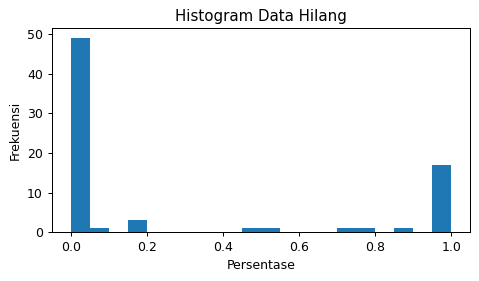

In [8]:
data_hilang = df.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(6,3), dpi=90)
data_hilang.plot.hist(bins=20)
plt.title('Histogram Data Hilang')
plt.xlabel('Persentase')
plt.ylabel('Frekuensi')
dihapus = list(data_hilang[data_hilang > 0.4].index)
df.drop(labels=dihapus, axis=1, inplace=True)

# Melakukan Overview Terhadap Beberapa Baris Dataset

In [9]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN


# Membersihkan Beberapa Kolom Dataset Yang Pasti Tidak Berguna

In [10]:
df.drop(columns=['Unnamed: 0', 'id', 'member_id'], inplace=True)
df['loan_status'].value_counts(dropna=False)

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

# Mengerucutkan Dataset Menjadi Hanya Terfokus Pada 2 Status Pinjaman Saja
## 2 Status Pinjaman Yang Dimaksud Ialah 'Fully Paid' dan 'Charged Off'

In [11]:
df=df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# Melakukan Overview Terhadap Bentuk Dataset Setelah Beberapa Perubahan

In [12]:
df.shape

(227214, 50)

# Mendefinisikan Variabel Fitur Numerik, Kategorik, dan Datetime Untuk Membantu Mengelompokkan Nama Kolom Sesuai Karakteristik Dataset Pada Tiap Kolom
## Melakukan Visualisasi Dataset Pada Tiap Kolom Untuk Membantu Mengelompokkan Nama Kolom Sesuai Karakteristiknya

In [13]:
fitur_numerik = []
fitur_kategorik = []
fitur_datetime = []
for i in df.columns[:25]:
    print(i,'\n')
    print(df[i].astype('category'))
    print(df[i].value_counts())
    print(df[i].isna().sum())
    print('\n'*2)

loan_amnt 

0          5000
1          2500
2          2400
3         10000
5          5000
          ...  
466276     8525
466277    18000
466278    10000
466281    22000
466283     2000
Name: loan_amnt, Length: 227214, dtype: category
Categories (1303, int64): [500, 700, 725, 750, ..., 34875, 34900, 34975, 35000]
10000    16455
12000    12750
15000    10818
20000     9929
8000      7911
         ...  
31075        1
31125        1
30475        1
23625        1
29350        1
Name: loan_amnt, Length: 1303, dtype: int64
0



funded_amnt 

0          5000
1          2500
2          2400
3         10000
5          5000
          ...  
466276     8525
466277    18000
466278    10000
466281    22000
466283     2000
Name: funded_amnt, Length: 227214, dtype: category
Categories (1306, int64): [500, 700, 725, 750, ..., 34875, 34900, 34975, 35000]
10000    16364
12000    12663
15000    10712
20000     9756
8000      7899
         ...  
30525        1
31325        1
28925        1
26275        

n    227212
y         2
Name: pymnt_plan, dtype: int64
0



url 

0         https://www.lendingclub.com/browse/loanDetail....
1         https://www.lendingclub.com/browse/loanDetail....
2         https://www.lendingclub.com/browse/loanDetail....
3         https://www.lendingclub.com/browse/loanDetail....
5         https://www.lendingclub.com/browse/loanDetail....
                                ...                        
466276    https://www.lendingclub.com/browse/loanDetail....
466277    https://www.lendingclub.com/browse/loanDetail....
466278    https://www.lendingclub.com/browse/loanDetail....
466281    https://www.lendingclub.com/browse/loanDetail....
466283    https://www.lendingclub.com/browse/loanDetail....
Name: url, Length: 227214, dtype: category
Categories (227214, object): ['https://www.lendingclub.com/browse/loanDetail..., 'https://www.lendingclub.com/browse/loanDetail..., 'https://www.lendingclub.com/browse/loanDetail..., 'https://www.lendingclub.com/browse/loanDetail..

# Menambahkan Beberapa Nama Kolom Sesuai Karakteristiknya Pada Variabel Fitur Numerik, Kategorik, ataupun Datetime
## Merubah Karakteristik Dataset Pada Fitur Datetime Menjadi Bertipe Float
## Merubah Karakteristik Dataset emp_length Menjadi Nilai Bertipe Float Yang Identik

In [14]:
fitur_numerik.extend(['loan_amnt','funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths'])
fitur_kategorik.extend(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state'])
fitur_datetime.extend(['issue_d', 'earliest_cr_line'])
df['loan_amnt'] = df['loan_amnt'].astype(np.float64)
df['funded_amnt'] = df['funded_amnt'].astype(np.float64)
df['issue_d'] = pd.DatetimeIndex(pd.to_datetime(df['issue_d'], format='%b-%y')).astype(np.int64)*1.0
df['earliest_cr_line'] = pd.DatetimeIndex(pd.to_datetime(df['earliest_cr_line'], format='%b-%y')).astype(np.int64)*1.0
# CLEANING UNTUK emp_length
emp_length_dict = {
    'emp_length': {
        '10+ years': 10.0,
        '9 years': 9.0,
        '8 years': 8.0,
        '7 years': 7.0,
        '6 years': 6.0,
        '5 years': 5.0,
        '4 years': 4.0,
        '3 years': 3.0,
        '2 years': 2.0,
        '1 year': 1.0,
        '< 1 year': 0.0,
    }
}
df.replace(emp_length_dict, inplace=True)

# Memastikan Karakteristik Dataset emp_length Sesuai Dengan Hasil Perubahan

In [15]:
df['emp_length'].unique()

array([10.,  0.,  3.,  9.,  4.,  5.,  1.,  6.,  2.,  7.,  8., nan])

## Melakukan Visualisasi Dataset Pada Tiap Kolom Untuk Membantu Mengelompokkan Nama Kolom Sesuai Karakteristiknya

In [16]:
for i in df.columns[25:50]:
    print(i,'\n')
    print(df[i].astype('category'))
    print(df[i].value_counts())
    print(df[i].isna().sum())
    print('\n'*2)

open_acc 

0          3.0
1          3.0
2          2.0
3         10.0
5          9.0
          ... 
466276    12.0
466277    16.0
466278     9.0
466281    18.0
466283    21.0
Name: open_acc, Length: 227214, dtype: category
Categories (57, float64): [0.0, 1.0, 2.0, 3.0, ..., 54.0, 55.0, 58.0, 76.0]
9.0     22000
8.0     21073
10.0    20676
7.0     19141
11.0    19019
12.0    16680
6.0     16246
13.0    13967
14.0    11660
5.0     11466
15.0     9357
16.0     7682
4.0      6923
17.0     6007
18.0     4858
19.0     3833
3.0      3340
20.0     2902
21.0     2276
22.0     1733
23.0     1296
2.0      1156
24.0     1010
25.0      751
26.0      500
27.0      394
28.0      256
29.0      214
30.0      159
31.0      111
32.0      106
33.0       74
34.0       58
35.0       51
1.0        41
36.0       39
37.0       34
38.0       28
39.0       22
41.0       13
40.0       12
42.0        8
45.0        6
43.0        6
0.0         5
49.0        4
44.0        4
46.0        3
47.0        3
48.0        2


0.0000      204480
2.0000          15
1.8800          11
4.5200          11
1.8000          11
             ...  
11.4895          1
1.9296           1
217.7010         1
86.5908          1
11.5940          1
Name: collection_recovery_fee, Length: 20099, dtype: int64
0



last_pymnt_d 

0         Jan-15
1         Apr-13
2         Jun-14
3         Jan-15
5         Jan-15
           ...  
466276    May-14
466277    Nov-14
466278    Sep-15
466281    Dec-14
466283    Dec-14
Name: last_pymnt_d, Length: 227214, dtype: category
Categories (97, object): ['Apr-08', 'Apr-09', 'Apr-10', 'Apr-11', ..., 'Sep-12', 'Sep-13', 'Sep-14', 'Sep-15']
Jul-15    11692
Mar-15    10082
Jun-15    10071
Apr-15    10046
May-15     9614
          ...  
Jun-08       10
Nov-08       10
Mar-08        5
Jan-08        4
Feb-08        1
Name: last_pymnt_d, Length: 97, dtype: int64
364



last_pymnt_amnt 

0          171.62
1          119.66
2          649.91
3          357.48
5          161.03
           ...   
466276  

# Menambahkan Beberapa Nama Kolom Sesuai Karakteristiknya Pada Variabel Fitur Numerik, Kategorik, ataupun Datetime
## Merubah Karakteristik Dataset Pada Fitur Datetime Menjadi Bertipe Float
## Menambahkan Dataset Pada Fitur Datetime Kedalam Fitur Numerik Karena Telah Dilakukan Perubahan Karakteristik Dataset

In [17]:
fitur_numerik.extend(['open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'])
fitur_kategorik.extend(['initial_list_status'])
fitur_datetime.extend(['last_pymnt_d', 'last_credit_pull_d'])
df['revol_bal'] = df['revol_bal'].astype(np.float64)
df['revol_util'] = df['revol_util'].fillna(0.0)
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(0.0)
df['total_rev_hi_lim'] = df['total_rev_hi_lim'].fillna(0.0)
df['last_pymnt_d'] = pd.DatetimeIndex(pd.to_datetime(df['last_pymnt_d'], format='%b-%y')).astype(np.int64)*1.0
df['last_credit_pull_d'] = pd.DatetimeIndex(pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')).astype(np.int64)*1.0
# MENAMBAHKAN fitur_datetime YANG TELAH DI-CONVERT KE NUMERIK KE fitur_numerik
fitur_numerik.extend(fitur_datetime)

# Melakukan Visualisasi Pada Fitur Numerik Untuk Mengetahui Mana Dataset Yang Tidak Berpengaruh Terhadap Model Machine Learning

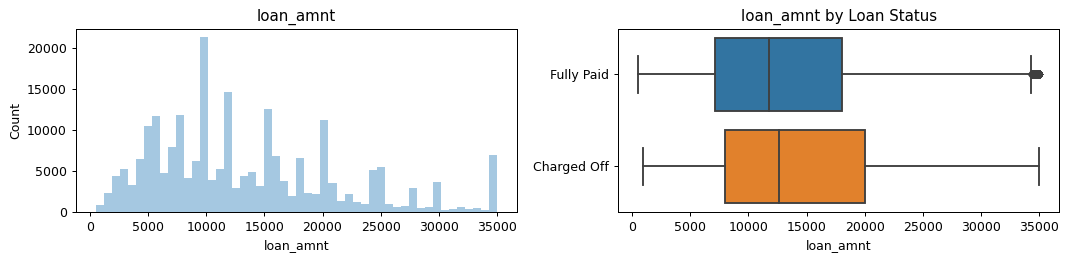

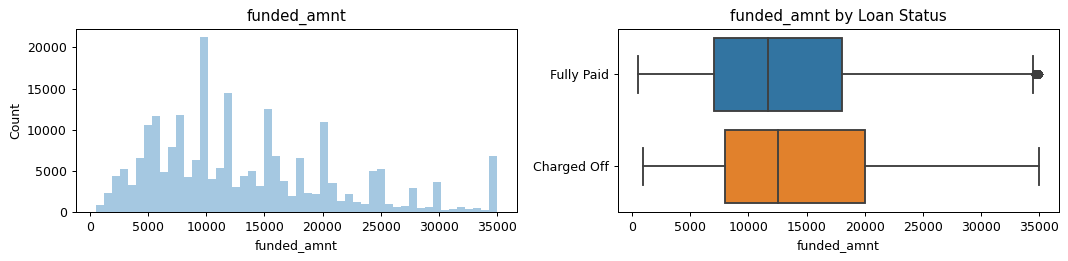

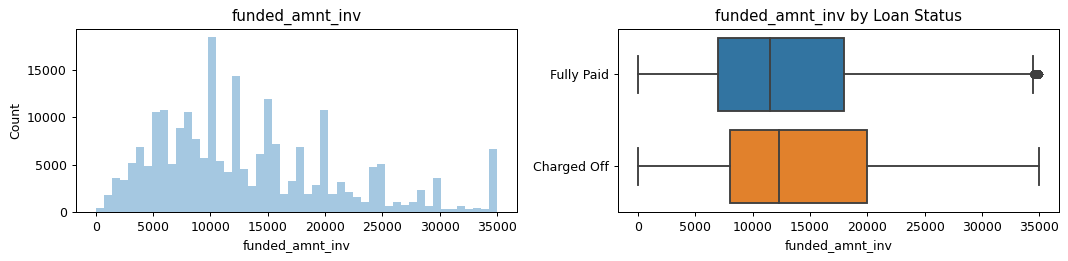

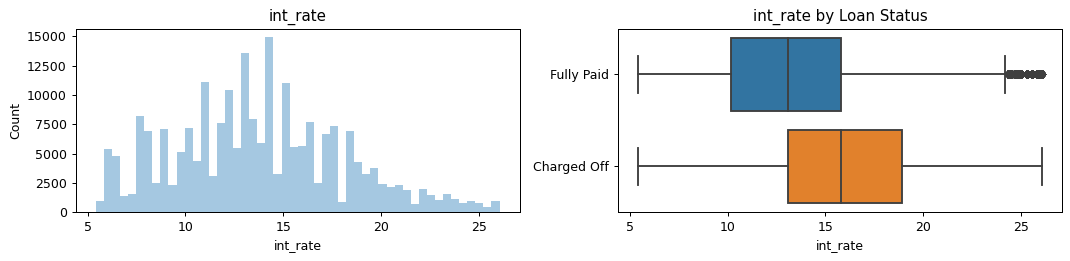

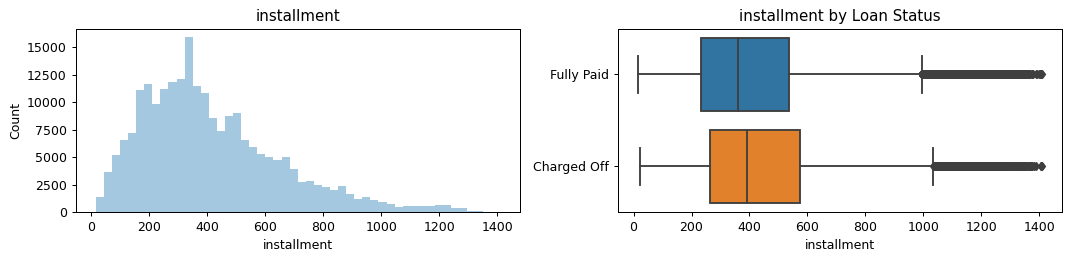

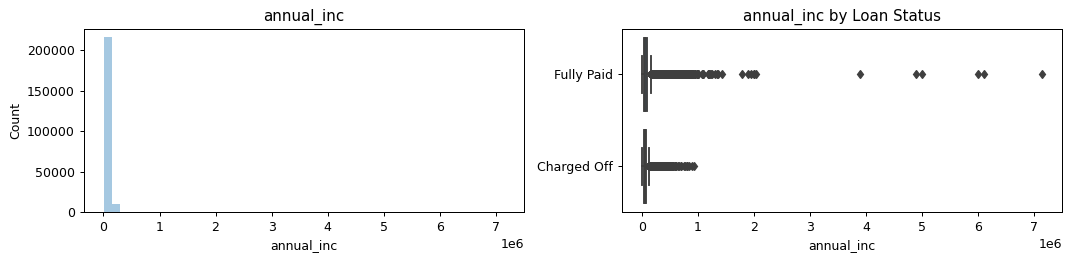

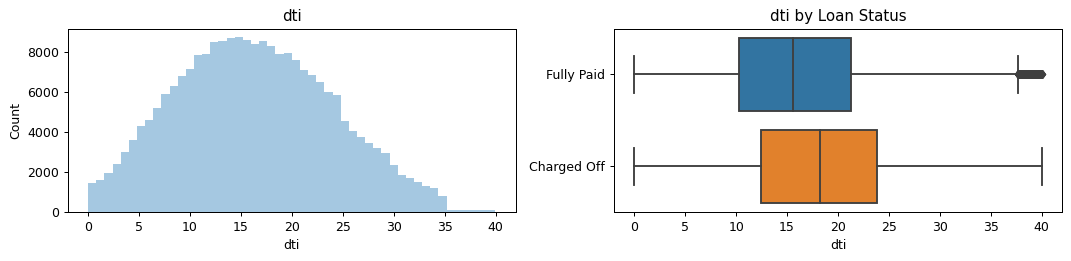

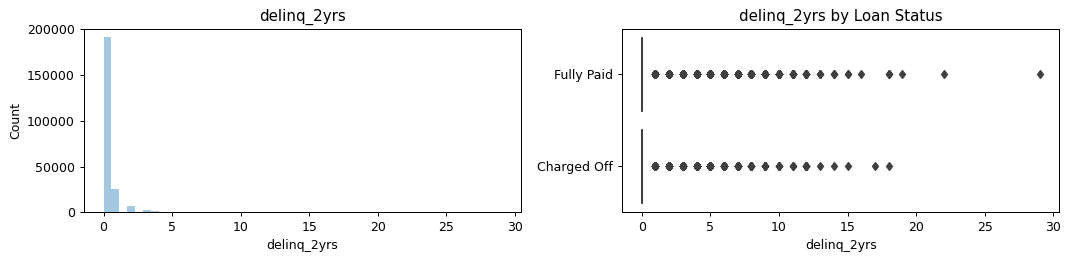

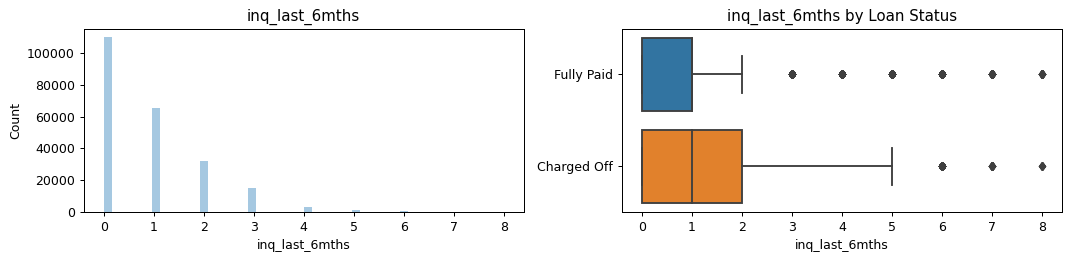

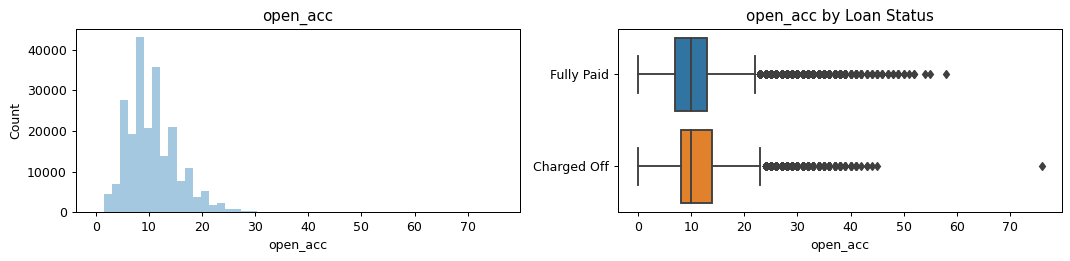

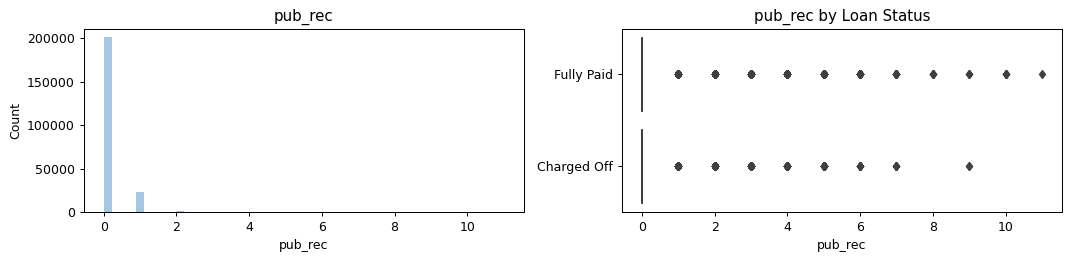

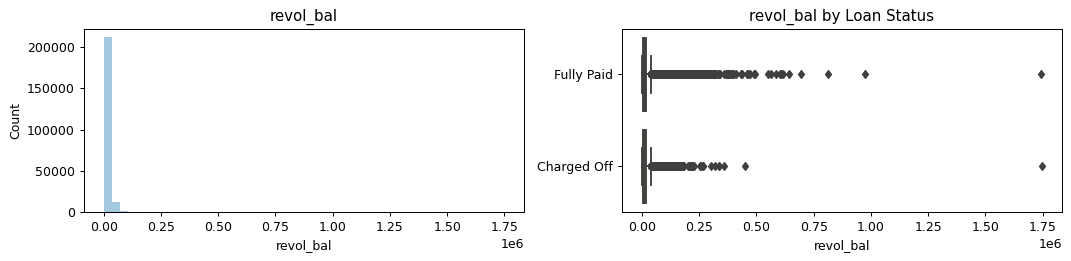

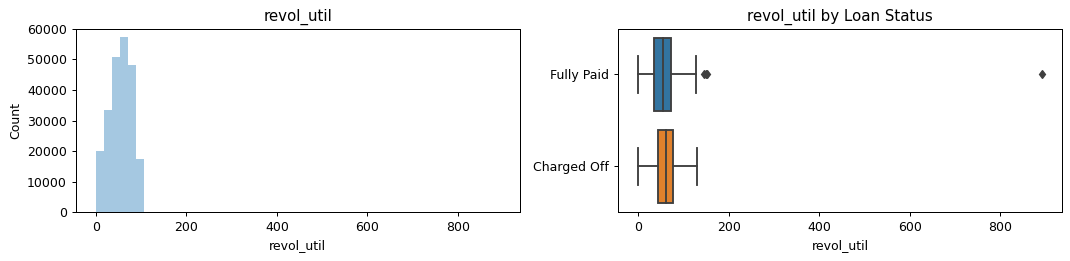

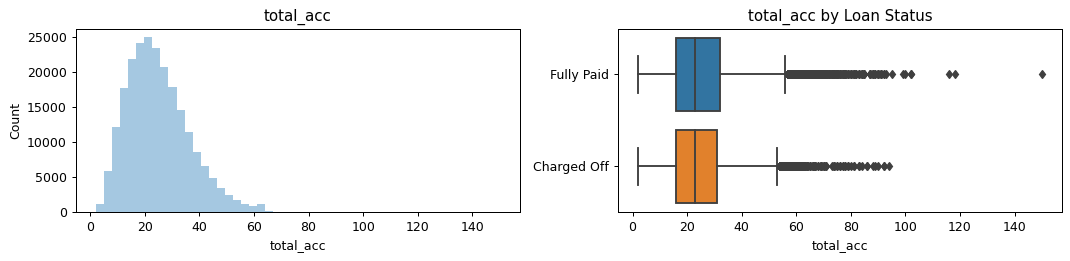

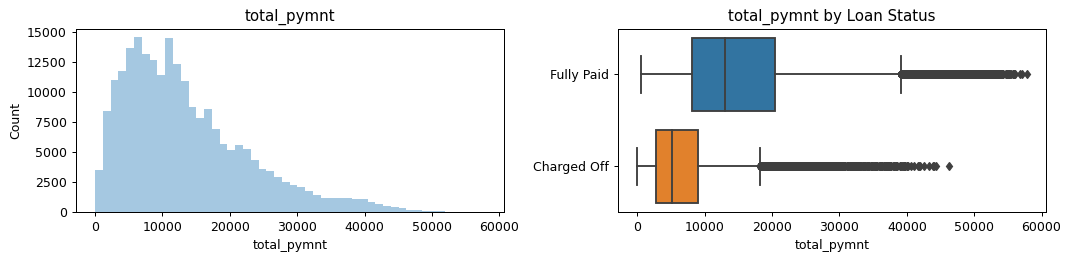

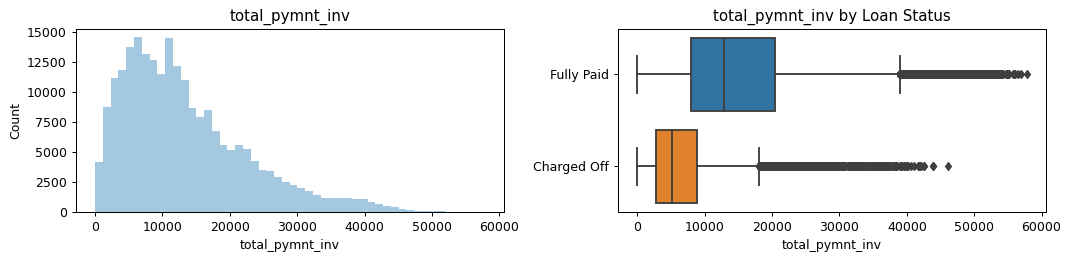

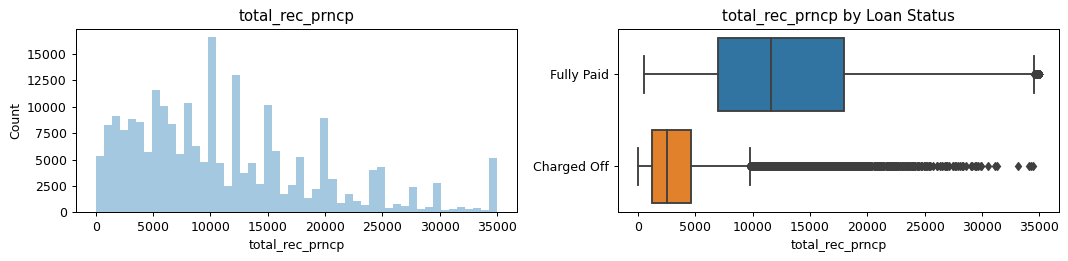

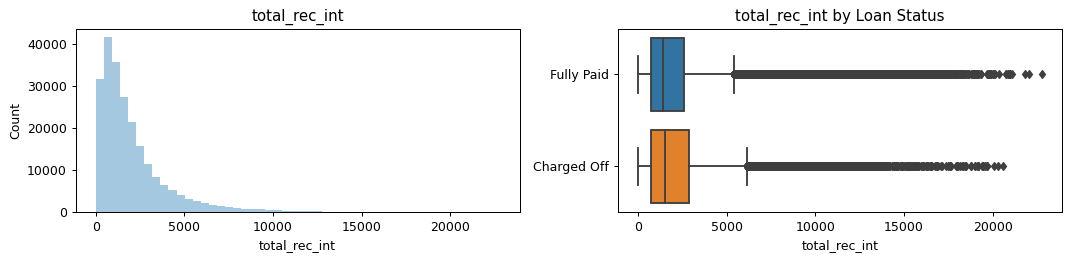

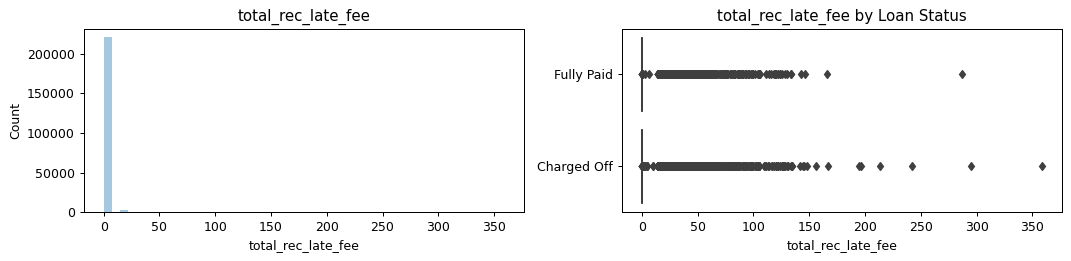

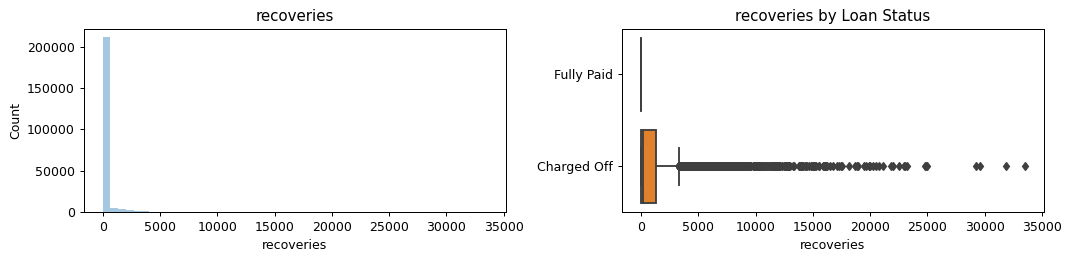

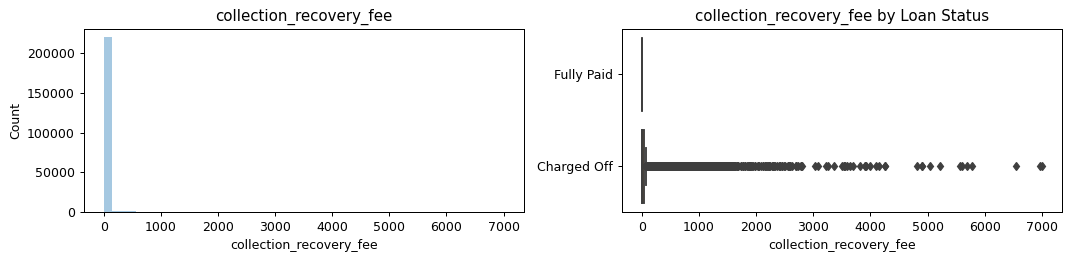

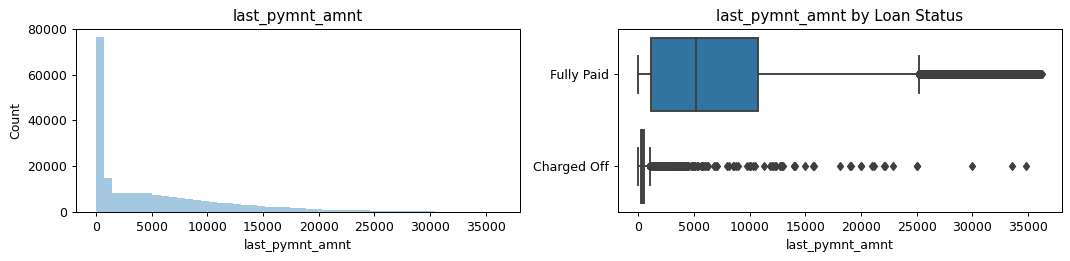

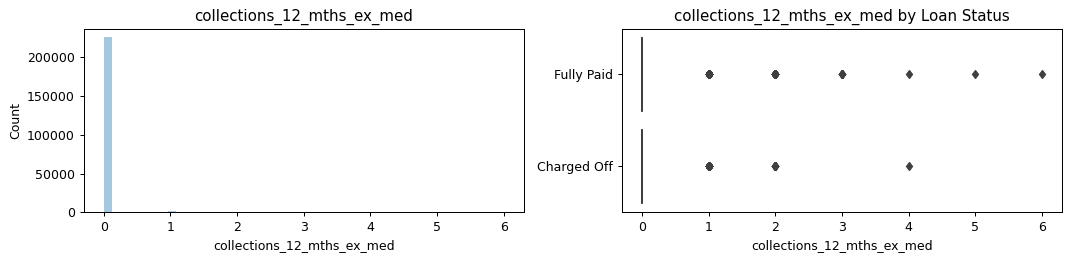

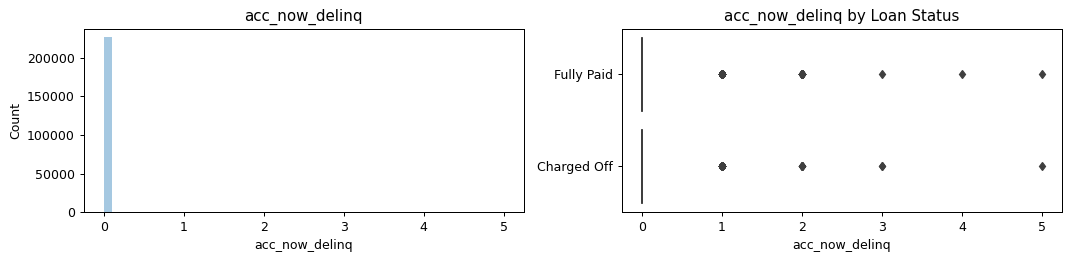

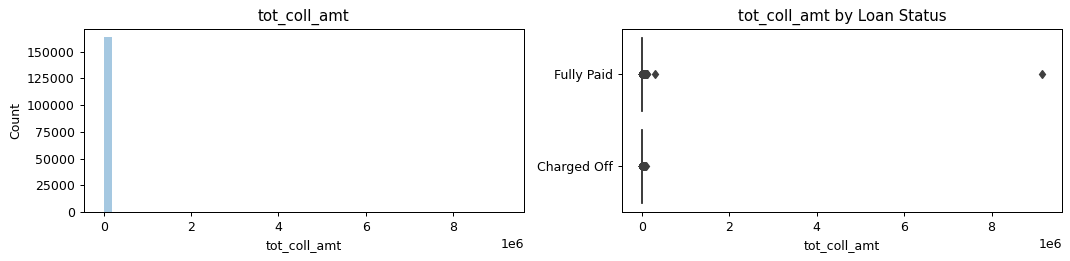

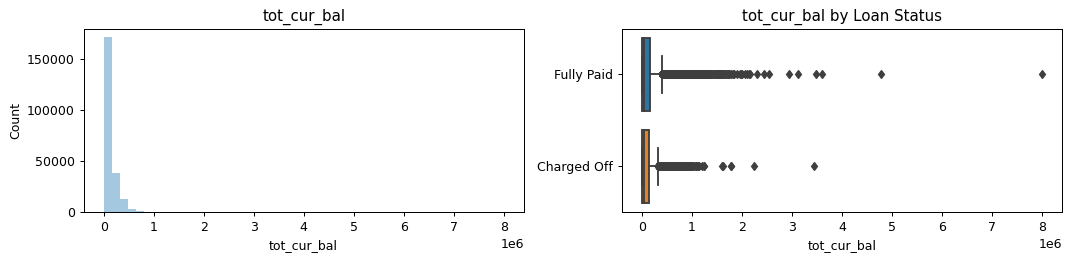

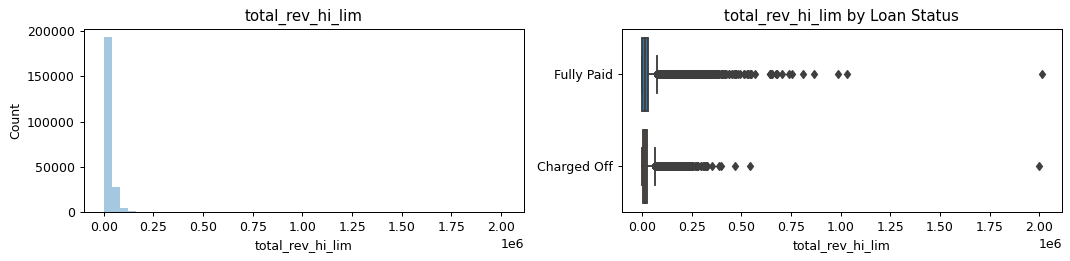

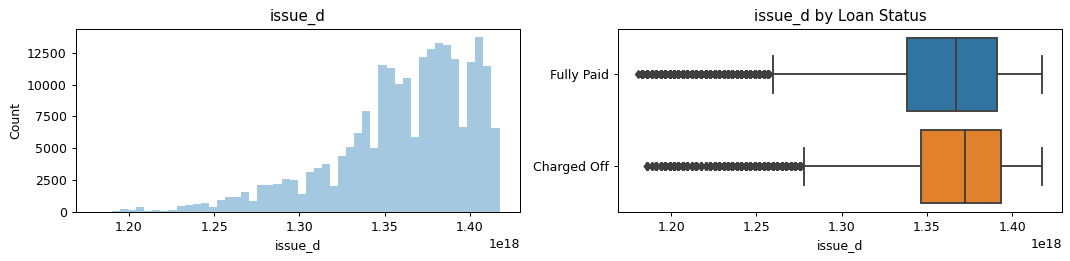

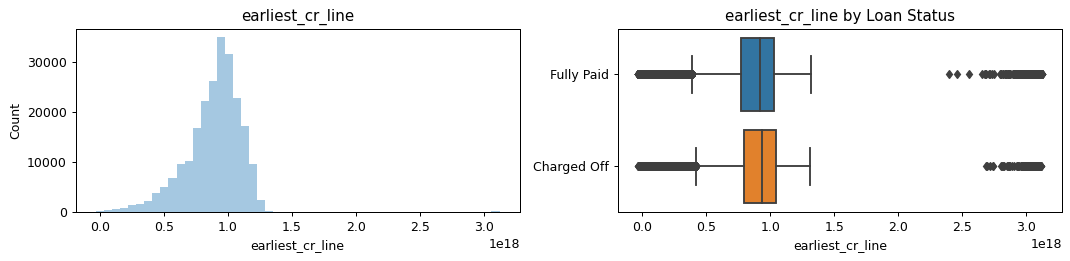

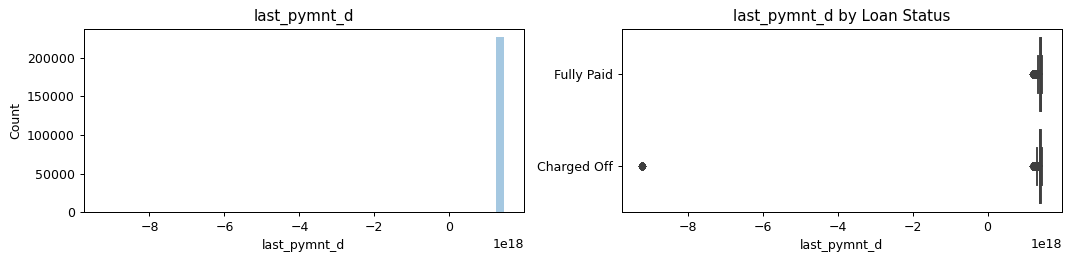

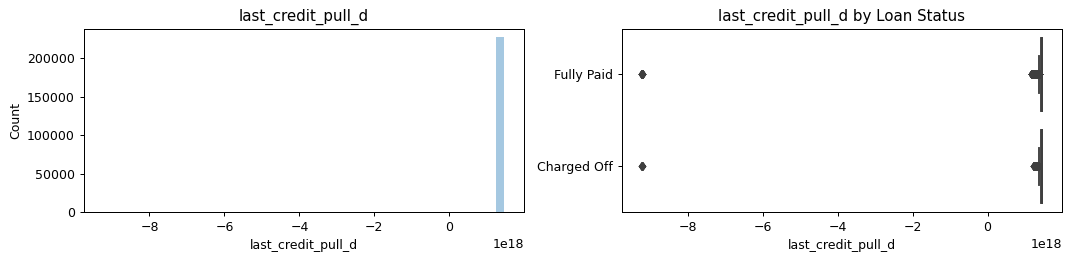

In [18]:
for i in fitur_numerik:
    vis_kol(df, i, i, True)
    print('\n'*3)

# Membersihkan Beberapa Dataset Berdasarkan Nama Kolom Yang Tidak Berpengaruh Terhadap Model Machine Learning Sesuai Hasil Visualisasi

In [19]:
fitur_numerik = [i for i in fitur_numerik if i not in ['funded_amnt', 'funded_amnt_inv', 'total_pymnt_inv', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'earliest_cr_line']]

# Melakukan Visualisasi Pada Fitur Numerik Untuk Mengetahui Mana Dataset Yang Tidak Berpengaruh Terhadap Model Machine Learning

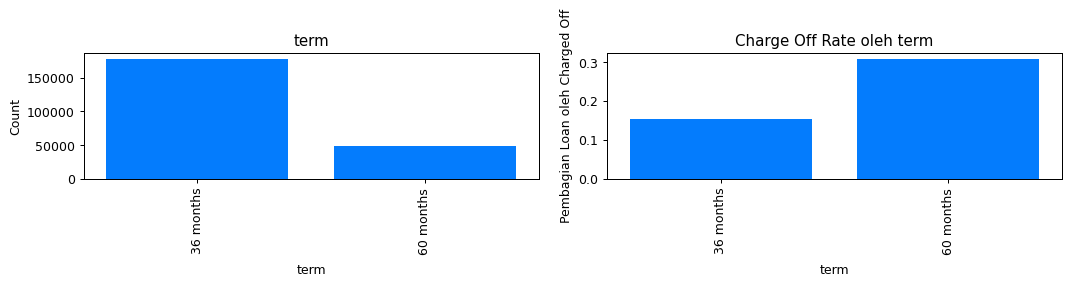

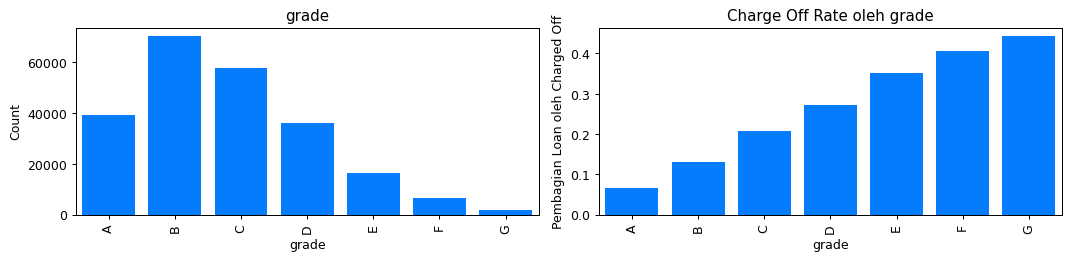

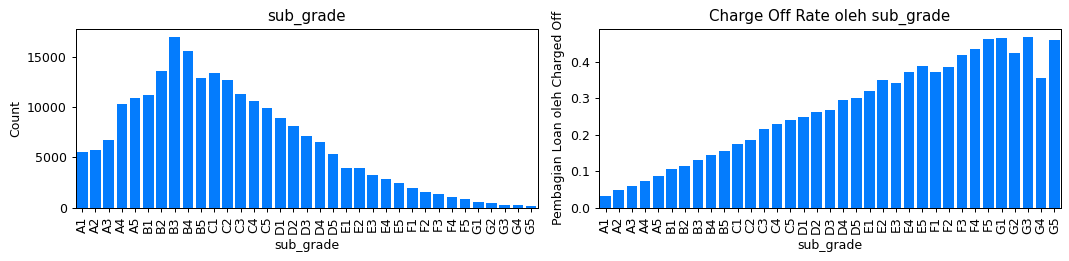

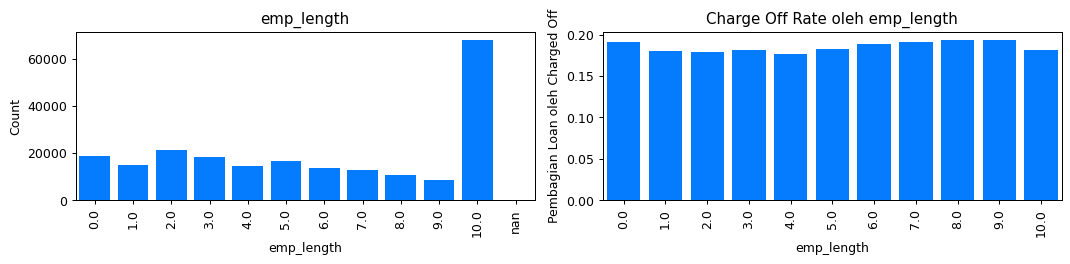

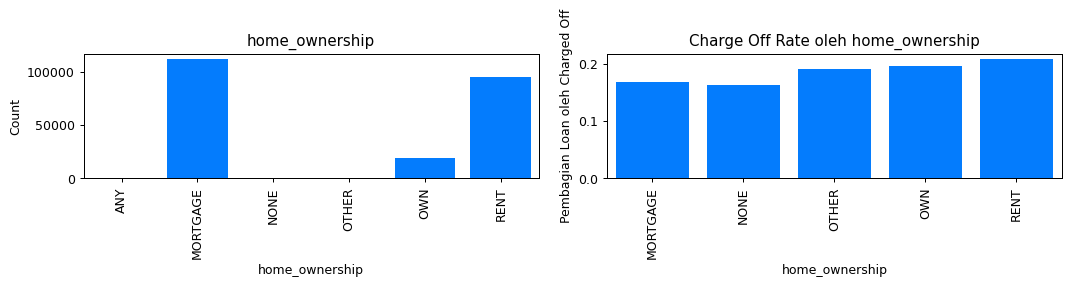

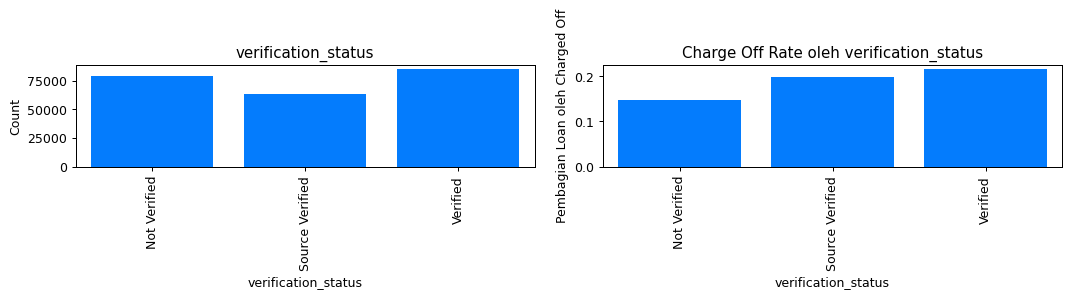

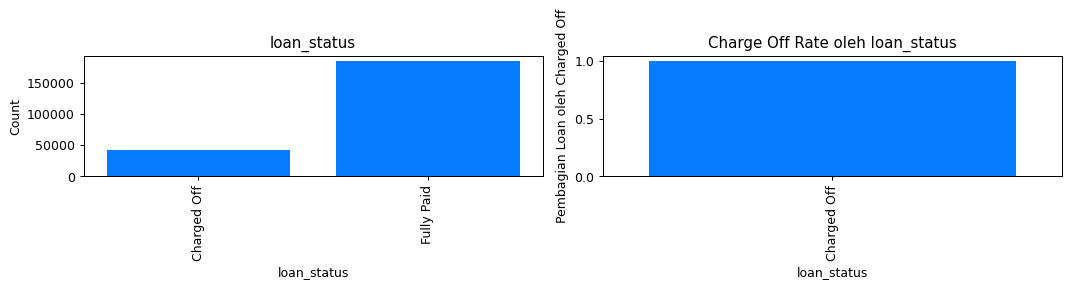

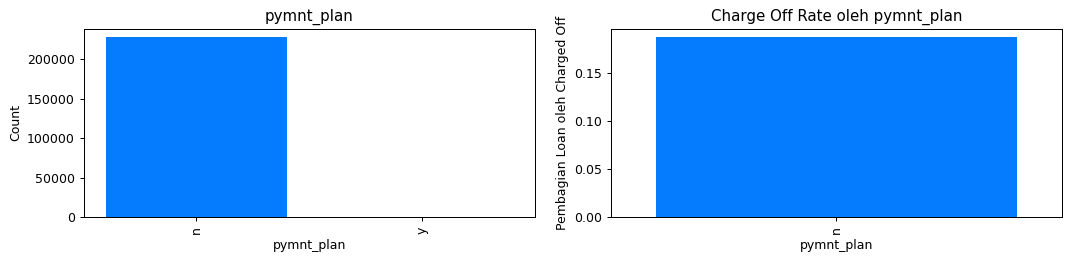

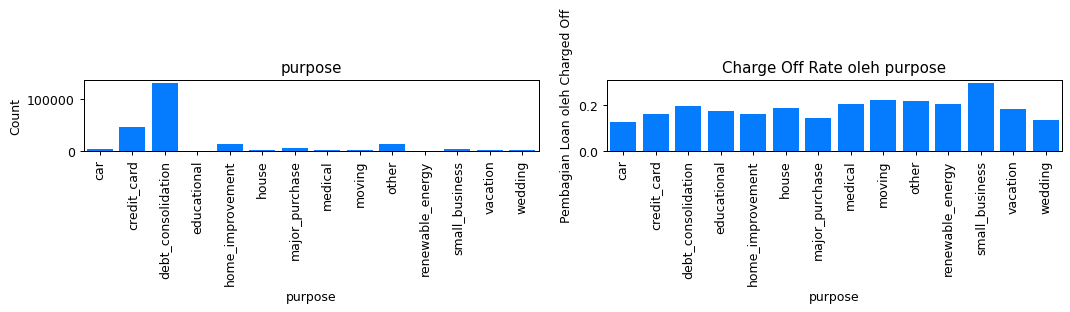

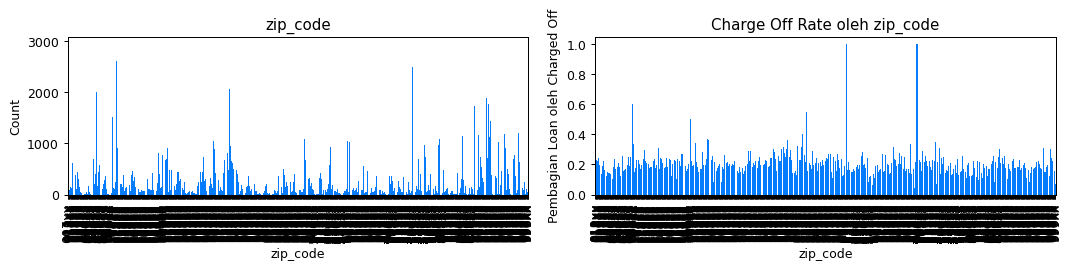

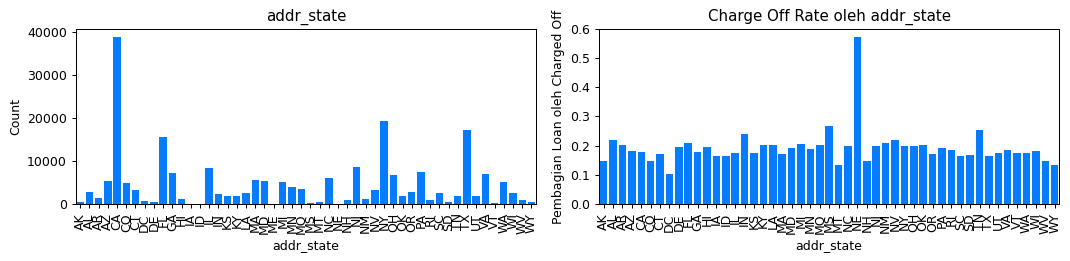

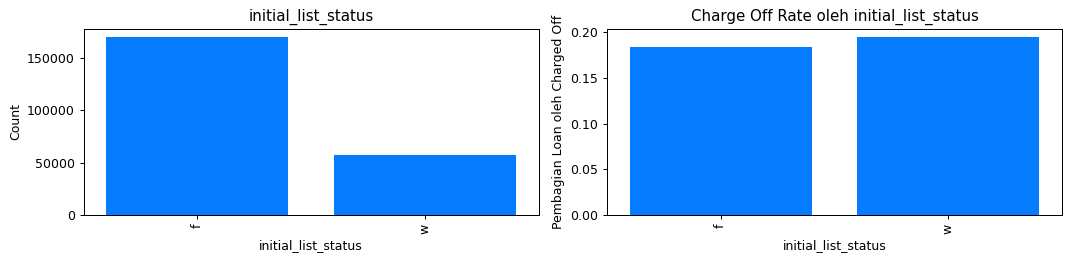

In [20]:
for i in fitur_kategorik:
    vis_kol(df, i, i, False)
    print('\n'*3)

# Membersihkan Beberapa Dataset Berdasarkan Nama Kolom Yang Tidak Berpengaruh Terhadap Model Machine Learning Sesuai Hasil Visualisasi

In [21]:
fitur_kategorik = [i for i in fitur_kategorik if i not in ['verification_status', 'pymnt_plan', 'zip_code', 'addr_state', 'initial_list_status']]

# Mengeluarkan Isi Fitur Numerik dan Kategorik Beserta Panjang Isinya

In [22]:
print(fitur_numerik, len(fitur_numerik))
print(fitur_kategorik, len(fitur_kategorik))

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'total_pymnt', 'total_rec_prncp', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'issue_d', 'last_pymnt_d', 'last_credit_pull_d'] 15
['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'loan_status', 'purpose'] 7


# Membuat Beberapa Variabel Dataframe Untuk Menjadi Wadah Baru Bagi Dataset Fitur Numerik, Kategorik, dan Target ('Fully Paid', 'Charged Off')
## Memastikan Dataframe Fitur Numerik Tidak Memiliki Nilai Null
## Menambahkan Dataset Pada Dataframe Fitur Numerik
## Merapikan Index Pada Dataframe Fitur Numerik
## Melakukan Overview Pada Dataframe Fitur Numerik

In [23]:
df_numerik = pd.DataFrame()
df_kategorik = pd.DataFrame()
df_target = pd.DataFrame()
df.dropna(subset=['emp_length', 'collections_12_mths_ex_med'], inplace=True)
fitur_numerik = [i for i in fitur_numerik if i not in ['tot_coll_amt']]
for i in fitur_numerik:
    df_numerik = pd.concat([df_numerik, df[i]], axis=1)
print('Tidak ada data null di df_numerik' if [i for i in df_numerik.isna().sum() if i != 0] == [] else 'Masih ada data null di df_numerik')
print(df_numerik.shape)
df_numerik.reset_index(inplace=True)
df_numerik.drop(columns='index', inplace=True)
df_numerik.head()

Tidak ada data null di df_numerik
(218485, 15)


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,total_pymnt,total_rec_prncp,recoveries,collection_recovery_fee,last_pymnt_amnt,issue_d,last_pymnt_d,last_credit_pull_d
0,5000.0,10.65,162.87,24000.0,27.65,0.0,1.0,5861.071414,5000.00,0.00,0.00,171.62,1.322698e+18,1.420070e+18,1.451606e+18
1,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,1008.710000,456.46,117.08,1.11,119.66,1.322698e+18,1.364774e+18,1.377994e+18
2,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,3003.653644,2400.00,0.00,0.00,649.91,1.322698e+18,1.401581e+18,1.451606e+18
3,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,12226.302210,10000.00,0.00,0.00,357.48,1.322698e+18,1.420070e+18,1.420070e+18
4,5000.0,7.90,156.46,36000.0,11.20,0.0,3.0,5631.377753,5000.00,0.00,0.00,161.03,1.322698e+18,1.420070e+18,1.441066e+18


## Memastikan Dataframe Fitur Kategorik Tidak Memiliki Nilai Null
## Menambahkan Dataset Pada Dataframe Fitur Kategorik
## Menambahkan Dataset Pada Dataframe Fitur Target
## Merapikan Index Pada Dataframe Fitur Kategorik
## Melakukan Overview Pada Dataframe Fitur Kategorik

In [24]:
for i in fitur_kategorik:
    df_dummy = pd.get_dummies(df[i])
    df_dummy.drop(df_dummy.columns[-1], axis=1, inplace=True)
    df_dummy = df_dummy.astype(np.float64)
    if i != 'loan_status':
        df_kategorik = pd.concat([df_kategorik, df_dummy], axis=1)
    else:
        df_target = pd.concat([df_target, df_dummy], axis=1)
print('Tidak ada data null di df_kategorik' if [i for i in df_kategorik.isna().sum() if i != 0] == [] else 'Masih ada data null di df_kategorik')
print(df_kategorik.shape)
df_kategorik.reset_index(inplace=True)
df_kategorik.drop(columns='index', inplace=True)
df_kategorik.head()

Tidak ada data null di df_kategorik
(218485, 69)


,36 months,A,B,C,D,E,F,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,ANY,MORTGAGE,NONE,OTHER,OWN,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Memastikan Dataframe Fitur Target Tidak Memiliki Nilai Null
## Merapikan Index Pada Dataframe Fitur Target
## Melakukan Overview Pada Dataframe Fitur Target

In [25]:
print('Tidak ada data null di df_target' if [i for i in df_target.isna().sum() if i != 0] == [] else 'Masih ada data null di df_target')
print(df_target.shape)
df_target.reset_index(inplace=True)
df_target.drop(columns='index', inplace=True)
df_target.head()

Tidak ada data null di df_target
(218485, 1)


,Charged Off
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0


### menambahkan tambahan kode untuk standarscaler bila diperlukan di masa depan

In [26]:
#sc = StandardScaler()
#sc_numerik = pd.DataFrame(sc.fit_transform(df_numerik), columns=df_numerik.columns)
#sc_numerik.head()

# Mendefinisikan Variabel X dan y Sebagai Variabel Fitur dan Target Untuk Digunakan Training dan Testing Pada Model Machine Learning
## Membagi Data Pada Variabel X dan y Dengan Perbandingan Training:Testing = 0.8:0.2

In [27]:
X = pd.concat([df_numerik, df_kategorik], axis=1)
y = df_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Melakukan Overview Terhadap Panjang Data Training Dari Segi Fitur dan Target

In [28]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

174788
43697
174788
43697


# Menyempurnakan Data Agar Terjadi Keseimbangan Data Target Menggunakan Algoritma SMOTE

In [29]:
from imblearn.over_sampling import SMOTE
print(y_train.value_counts())#Previous original class distribution
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
print(len(y_train))
print(y_train.value_counts()) #Preview synthetic sample class distribution

Charged Off
0.0            142539
1.0             32249
dtype: int64
285078
Charged Off
0.0            142539
1.0            142539
dtype: int64


# Membuat Model Pertama Menggunakan Algoritma Logistic Regression
## Melakukan Observasi Performa 

Training Accuracy: 61.25%
Validation accuracy: 56.52%
Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.54      0.67     35799
         1.0       0.25      0.68      0.36      7898

    accuracy                           0.57     43697
   macro avg       0.57      0.61      0.52     43697
weighted avg       0.77      0.57      0.61     43697

Confusion Matrix


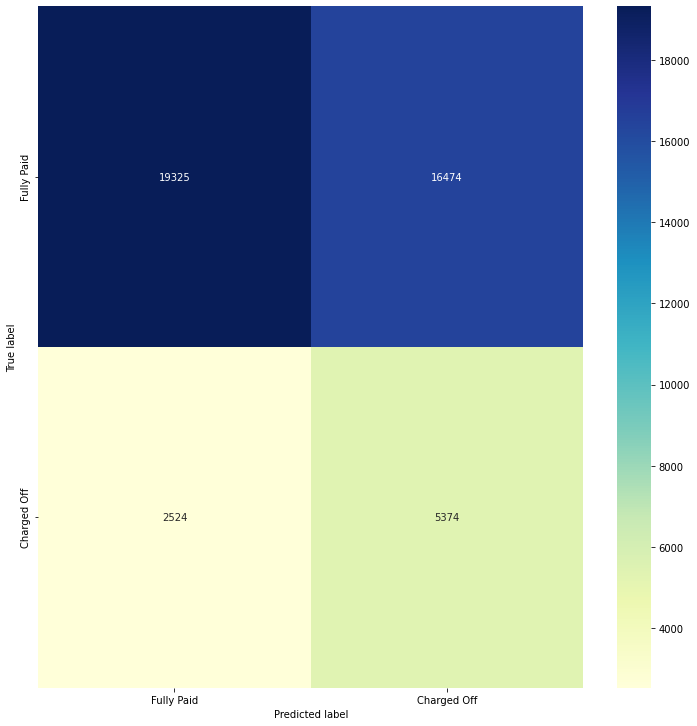

In [30]:
modelA=LogisticRegression()
modelA.fit(X_train, y_train)
training_pred = modelA.predict(X_train)
y_pred = modelA.predict(X_test)
train_accuracy = accuracy_score(y_train, training_pred)
val_accuracy = accuracy_score(y_test, y_pred)

print("Training Accuracy: {:.4}%".format(train_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

vis_eval(y_test, y_pred)

## Melakukan Visualisasi Performa Dari Model Pertama

In [31]:
performa(y_test, y_pred)

68.0 % True Positive Rate dan  46.0 % False Positive Rate.


## Melakukan Visualisasi Kurva ROC dari Model Pertama

Test AUC: 0.6529629472752368
train AUC: 0.6545957781611849


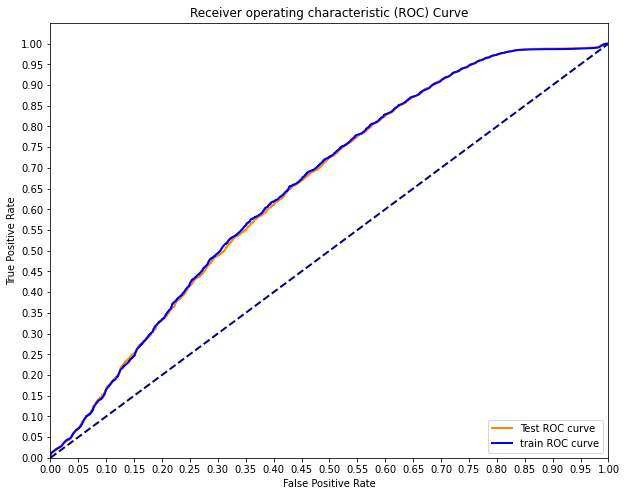

In [32]:
logreg_roc(modelA, X_train, X_test, y_train, y_test)

# Membuat Model Kedua Menggunakan Algoritma Random Forest
## Melakukan Observasi Performa

Training Accuracy: 100.0%
Validation accuracy: 99.74%
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35799
         1.0       1.00      0.99      0.99      7898

    accuracy                           1.00     43697
   macro avg       1.00      0.99      1.00     43697
weighted avg       1.00      1.00      1.00     43697

Confusion Matrix


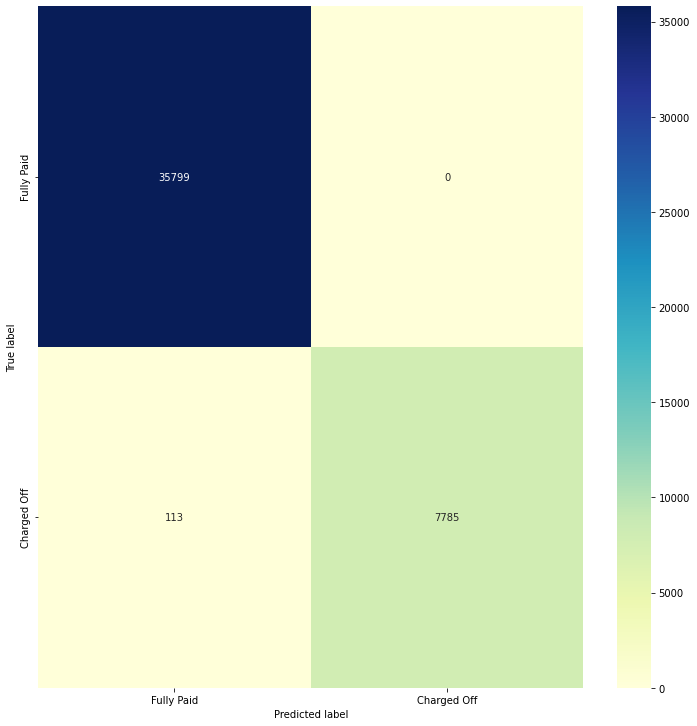

In [33]:
modelB=RandomForestClassifier()
modelB.fit(X_train, y_train)
training_pred = modelB.predict(X_train)
y_pred = modelB.predict(X_test)
train_accuracy = accuracy_score(y_train, training_pred)
val_accuracy = accuracy_score(y_test, y_pred)

print("Training Accuracy: {:.4}%".format(train_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

vis_eval(y_test, y_pred)

## Melakukan Visualisasi Performa Dari Model Kedua

In [34]:
performa(y_test, y_pred)

99.0 % True Positive Rate dan  0.0 % False Positive Rate.


## Melakukan Visualisasi Keutamaan Fitur dari Model Kedua

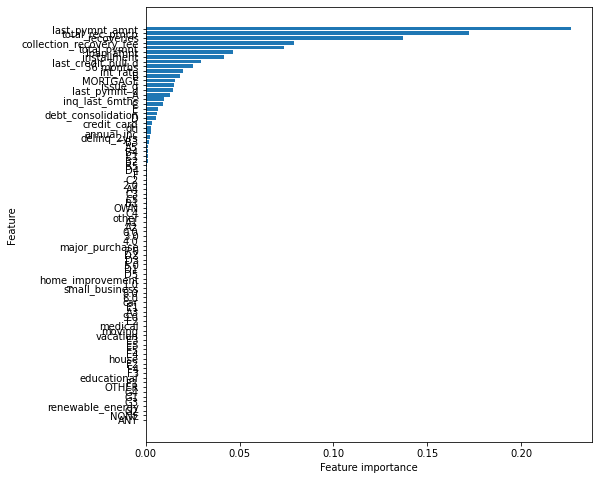

In [35]:
vis_keutamaan_fitur(modelB, X_train)

# Membuat Model Ketiga Menggunakan XGBooster
## Melakukan Observasi Performa

Training Accuracy: 100.0%
Validation accuracy: 99.93%
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35799
         1.0       1.00      1.00      1.00      7898

    accuracy                           1.00     43697
   macro avg       1.00      1.00      1.00     43697
weighted avg       1.00      1.00      1.00     43697

Confusion Matrix


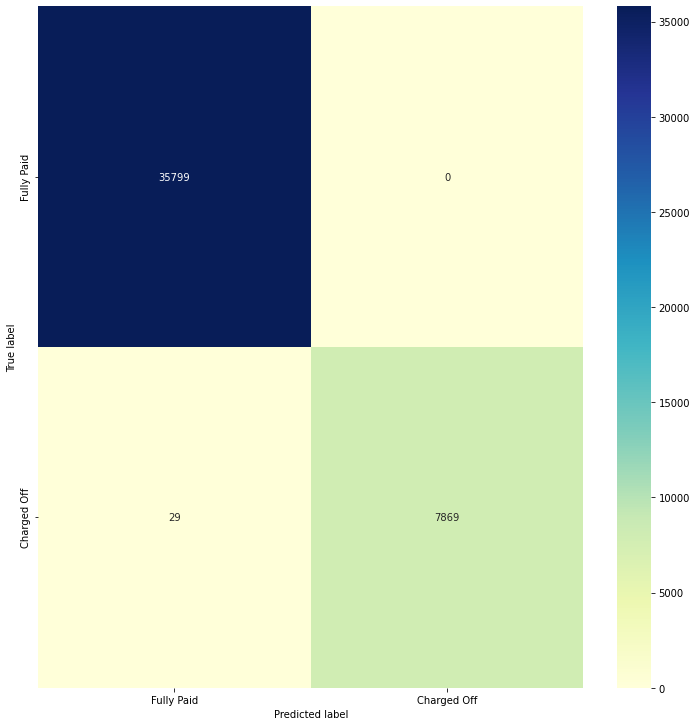

In [36]:
modelC=xgb.XGBClassifier()
modelC.fit(X_train, y_train)
training_pred = modelC.predict(X_train)
y_pred = modelC.predict(X_test)
train_accuracy = accuracy_score(y_train, training_pred)
val_accuracy = accuracy_score(y_test, y_pred)

print("Training Accuracy: {:.4}%".format(train_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

vis_eval(y_test, y_pred)

## Melakukan Visualisasi Performa Dari Model Kedua

In [37]:
performa(y_test, y_pred)

100.0 % True Positive Rate dan  0.0 % False Positive Rate.


## Melakukan Visualisasi Keutamaan Fitur dari Model Kedua

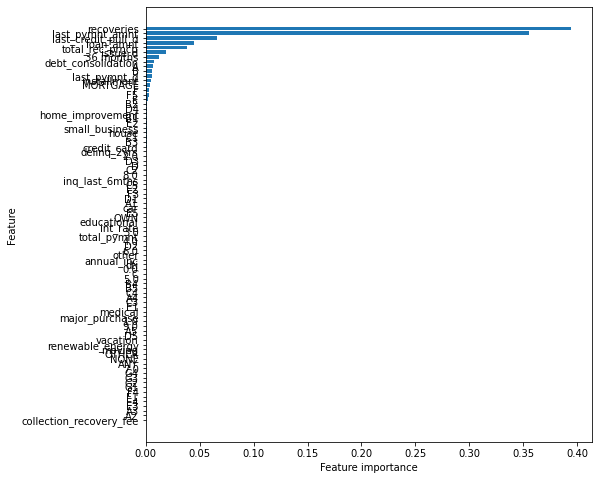

In [38]:
vis_keutamaan_fitur(modelC, X_train)

# Melakukan Finalisasi Model, Evaluasi, Penggabungan dan Simulasi Model Dengan Dataset Sesuasi Fitur-Fitur Yang Tersedia

In [39]:
import joblib

fileA = 'modelA.sav'
joblib.dump(modelA, fileA)
resultA = joblib.load(open(fileA, 'rb')).score(X_test, y_test)
print(resultA)

fileB = 'modelB.sav'
joblib.dump(modelB, fileB)
resultB = joblib.load(open(fileB, 'rb')).score(X_test, y_test)
print(resultB)

fileC = 'modelC.sav'
joblib.dump(modelC, fileC)
resultC = joblib.load(open(fileC, 'rb')).score(X_test, y_test)
print(resultC)

0.5652333112112959
0.9974140101151109
0.9993363388790992


In [40]:
print(fitur_numerik)
print(fitur_kategorik)

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'total_pymnt', 'total_rec_prncp', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'issue_d', 'last_pymnt_d', 'last_credit_pull_d']
['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'loan_status', 'purpose']


In [41]:
loan_amnt = 5000.0
int_rate = 10.65
installment = 162.87
annual_inc = 24000.0
dti = 27.65
delinq_2yrs = 0.0
inq_last_6mths = 1.0
total_pymnt = 5861.071414
total_rec_prncp = 5000.0
recoveries = 0.0
collection_recovery_fee = 0.0
last_pymnt_amnt = 171.62

issue_d_y = 2011
issue_d_m = 12
issue_d_d = 1
issue_d = pd.DataFrame({'year': [issue_d_y], 'month': [issue_d_m], 'day': [issue_d_d]})
issue_d = pd.to_datetime(issue_d).astype(np.int64)*1.0

last_pymnt_d_y = 2015
last_pymnt_d_m = 1
last_pymnt_d = 1
last_pymnt_d = pd.DataFrame({'year': [last_pymnt_d_y], 'month': [last_pymnt_d_m], 'day': [last_pymnt_d]})
last_pymnt_d = pd.to_datetime(last_pymnt_d).astype(np.int64)*1.0

last_credit_pull_d_y = 2016
last_credit_pull_d_m = 1
last_credit_pull_d_d = 1
last_credit_pull_d = pd.DataFrame({'year': [last_credit_pull_d_y], 'month': [last_credit_pull_d_m], 'day': [last_credit_pull_d_d]})
last_credit_pull_d = pd.to_datetime(last_credit_pull_d).astype(np.int64)*1.0

fitur_numerik_tes = {'loan_amnt': pd.Series(loan_amnt), 'int_rate': int_rate, 'installment': installment, 'annual_inc': annual_inc,
                     'dti': dti, 'delinq_2yrs': delinq_2yrs, 'inq_last_6mths': inq_last_6mths, 'total_pymnt': total_pymnt,
                     'total_rec_prncp': total_rec_prncp, 'recoveries': recoveries, 'collection_recovery_fee': collection_recovery_fee,
                     'last_pymnt_amnt': last_pymnt_amnt, 'issue_d': issue_d, 'last_pymnt_d': last_pymnt_d,
                     'last_credit_pull_d': last_credit_pull_d
                    }

df_numerik_tes = pd.DataFrame()
for i in fitur_numerik_tes:
    df_numerik_tes[i] = fitur_numerik_tes[i]
df_numerik_tes.head()

#-----------------------------------------------------------------------------

loan_amnt = 2500.0
int_rate = 15.27
installment = 59.83
annual_inc = 30000.0
dti = 1.00
delinq_2yrs = 0.0
inq_last_6mths = 5.0
total_pymnt = 1008.710000
total_rec_prncp = 456.46
recoveries = 117.08
collection_recovery_fee = 1.11
last_pymnt_amnt = 119.66

issue_d_y = 2011
issue_d_m = 12
issue_d_d = 1
issue_d = pd.DataFrame({'year': [issue_d_y], 'month': [issue_d_m], 'day': [issue_d_d]})
issue_d = pd.to_datetime(issue_d).astype(np.int64)*1.0

last_pymnt_d_y = 2013
last_pymnt_d_m = 4
last_pymnt_d_d = 1
last_pymnt_d = pd.DataFrame({'year': [last_pymnt_d_y], 'month': [last_pymnt_d_m], 'day': [last_pymnt_d_d]})
last_pymnt_d = pd.to_datetime(last_pymnt_d).astype(np.int64)*1.0

last_credit_pull_d_y = 2013
last_credit_pull_d_m = 9
last_credit_pull_d_d = 1
last_credit_pull_d = pd.DataFrame({'year': [last_credit_pull_d_y], 'month': [last_credit_pull_d_m], 'day': [last_credit_pull_d_d]})
last_credit_pull_d = pd.to_datetime(last_credit_pull_d).astype(np.int64)*1.0

fitur_numerik_tes = {'loan_amnt': pd.Series(loan_amnt), 'int_rate': int_rate, 'installment': installment, 'annual_inc': annual_inc,
                     'dti': dti, 'delinq_2yrs': delinq_2yrs, 'inq_last_6mths': inq_last_6mths, 'total_pymnt': total_pymnt,
                     'total_rec_prncp': total_rec_prncp, 'recoveries': recoveries, 'collection_recovery_fee': collection_recovery_fee,
                     'last_pymnt_amnt': last_pymnt_amnt, 'issue_d': issue_d, 'last_pymnt_d': last_pymnt_d,
                     'last_credit_pull_d': last_credit_pull_d
                    }

for i in fitur_numerik_tes:
    df_numerik_tes[i] = fitur_numerik_tes[i]
df_numerik_tes.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,total_pymnt,total_rec_prncp,recoveries,collection_recovery_fee,last_pymnt_amnt,issue_d,last_pymnt_d,last_credit_pull_d
0,2500.0,15.27,59.83,30000.0,1.0,0.0,5.0,1008.71,456.46,117.08,1.11,119.66,1.322698e+18,1.364774e+18,1.377994e+18


In [42]:
term = '36 months'
grade = 'B'
sub_grade = 'B2'
emp_length = 10.0
home_ownership = 'RENT'
purpose = 'credit_card'

fitur_kategorik_tes = {'daftar_term': ['36 months'],
                       'daftar_grade': ['A', 'B', 'C', 'D', 'E', 'F'],
                       'daftar_sub_grade': ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4'],
                       'daftar_emp_length': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0],
                       'daftar_home_ownership': ['ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN'],
                       'daftar_purpose': ['car', 'credit_card', 'debt_consolidation', 'educational', 'home_improvement', 'house', 'major_purchase', 'medical', 'moving', 'other', 'renewable_energy', 'small_business', 'vacation']
                      }

df_kategorik_tes = pd.DataFrame()
for i in fitur_kategorik_tes:
    for j in fitur_kategorik_tes[i]:
        df_kategorik_tes[j] = pd.Series(float((j == term) |
                                              (j == grade) |
                                              (j == sub_grade) |
                                              (j == emp_length) |
                                              (j == home_ownership) |
                                              (j == purpose)))
        
#----------------------------------------------------------------------------

term = '60 months'
grade = 'C'
sub_grade = 'C4'
emp_length = 0.0
home_ownership = 'RENT'
purpose = 'car'

for i in fitur_kategorik_tes:
    for j in fitur_kategorik_tes[i]:
        df_kategorik_tes[j] = pd.Series(float((j == term) |
                                              (j == grade) |
                                              (j == sub_grade) |
                                              (j == emp_length) |
                                              (j == home_ownership) |
                                              (j == purpose)))

df_kategorik_tes.head()

,36 months,A,B,C,D,E,F,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,ANY,MORTGAGE,NONE,OTHER,OWN,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
X = pd.concat([df_numerik_tes, df_kategorik_tes], axis=1)
daftar_prediksi = [modelA.predict(X)[0], modelB.predict(X)[0], modelC.predict(X)[0]]
prediksi_final = max(daftar_prediksi, key=daftar_prediksi.count)
print(f'Model A = {daftar_prediksi[0]}, Model B = {daftar_prediksi[1]}, Model C = {daftar_prediksi[2]}, Model Ensemble = {prediksi_final}')

Model A = 0.0, Model B = 1.0, Model C = 1, Model Ensemble = 1.0


# Guntur Aji Pratama